# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

-  El propósito de este análisis es preparar una serie temporal financiera para su futura predicción,

In [50]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

## 1. Cargamos los datos

In [51]:
df = pd.read_csv('data/df_furniture.csv', parse_dates=['Month'])

In [52]:
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [54]:
df.rename(columns={'Month' : 'date'}, inplace=True)

In [55]:
df[df['date'].isna()]

,date,furniture_price_adjusted
15,NaT,2457.704334
21,NaT,2715.938414
39,NaT,2857.008678
40,NaT,3086.648631
60,NaT,3298.628987


## 2. Tratar la fecha como texto y parsear

In [60]:
# Extraer componentes de la fecha
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Verificamos que se han creado correctamente
df[['date', 'year', 'month', 'day']] 



,date,year,month,day
0,1992-01-01,1992.0,1.0,1.0
1,1992-02-01,1992.0,2.0,1.0
2,1992-03-01,1992.0,3.0,1.0
3,1992-04-01,1992.0,4.0,1.0
4,1992-05-01,1992.0,5.0,1.0
...,...,...,...,...
326,2019-03-01,2019.0,3.0,1.0
327,2019-04-01,2019.0,4.0,1.0
328,2019-05-01,2019.0,5.0,1.0
329,2019-06-01,2019.0,6.0,1.0


## 3. ¿De qué fecha a qué fecha va el histórico?

In [ ]:
print("Fecha inicial:", df['date'].min())
print("Fecha final:", df['date'].max())


Fecha inicial: 1992-01-01 00:00:00
Fecha final: 2019-07-01 00:00:00


In [61]:
df.tail(10)

,date,furniture_price_adjusted,year,month,day
321,2018-10-01,9569.037851,2018.0,10.0,1.0
322,2018-11-01,10380.194097,2018.0,11.0,1.0
323,2018-12-01,10726.595075,2018.0,12.0,1.0
324,2019-01-01,8431.965334,2019.0,1.0,1.0
325,2019-02-01,8271.237355,2019.0,2.0,1.0
326,2019-03-01,9718.107698,2019.0,3.0,1.0
327,2019-04-01,9248.814254,2019.0,4.0,1.0
328,2019-05-01,10001.305304,2019.0,5.0,1.0
329,2019-06-01,9431.337229,2019.0,6.0,1.0
330,2019-07-01,9887.800688,2019.0,7.0,1.0


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

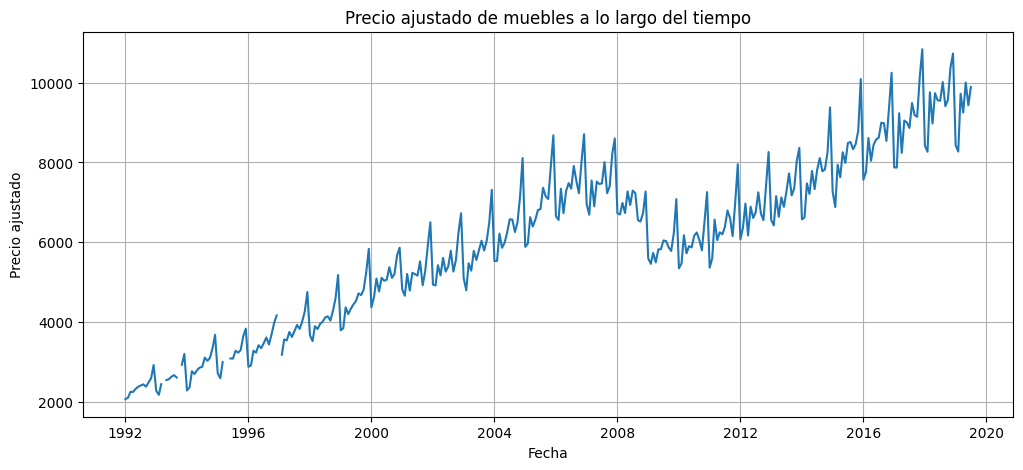

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['furniture_price_adjusted'])
plt.title("Precio ajustado de muebles a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio ajustado")
plt.grid(True)
plt.show()


- Es una serie temporal continua, donde el eje X representa fechas (años) y el eje Y el precio ajustado (posiblemente en unidades monetarias, ajustadas por inflación u otros factores).
- La serie sube con el tiempo, aumenta (tendencia creciente), la posible causa puede ser quelos muebles se encarecen con el tiempo.
- Estacionalidad, 

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [ ]:
# ADF (H0: la serie tiene raíz unitaria → NO es estacionaria)
adf_result = adfuller(df['furniture_price_adjusted'])
print("ADF p-value:", adf_result[1])

# KPSS (H0: la serie ES estacionaria)
kpss_result = kpss(df['furniture_price_adjusted'], regression='c', nlags="auto")
print("KPSS p-value:", kpss_result[1])


ADF p-value: 0.7035529748089981
KPSS p-value: 0.01


C:\Users\nsara\AppData\Local\Temp\ipykernel_2032\1202245153.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['furniture_price_adjusted'], regression='c', nlags="auto")


- Si ADF da un p > 0.05 y KPSS da un p < 0.05, entonces la serie no es estacionaria.

## 6. ¿Conoces algún método para representar mejor la tendencia?

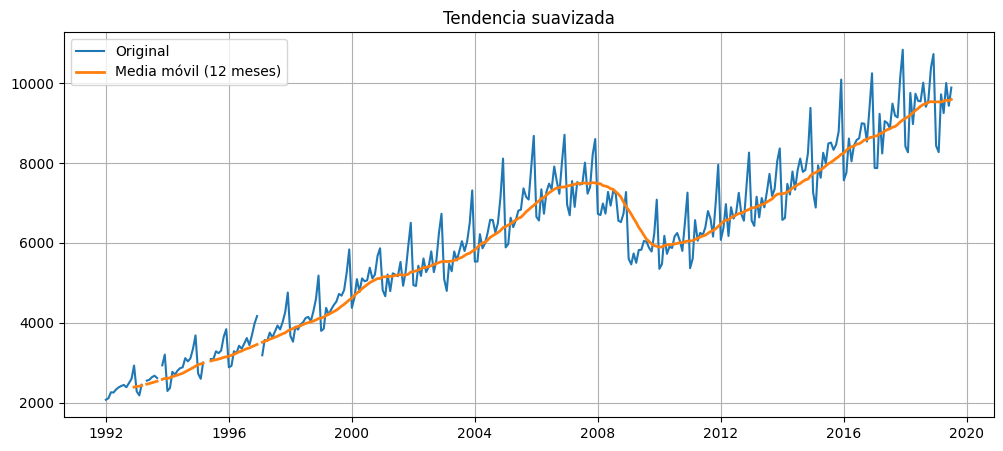

In [ ]:
# Suavizar la serie para ver mejor la tendencia
# Suavizar con una media móvil de 12 meses
df['rolling_mean'] = df['furniture_price_adjusted'].rolling(window=12).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['furniture_price_adjusted'], label='Original')
plt.plot(df['date'], df['rolling_mean'], label='Media móvil (12 meses)', linewidth=2)
plt.title("Tendencia suavizada")
plt.legend()
plt.grid(True)
plt.show()


## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

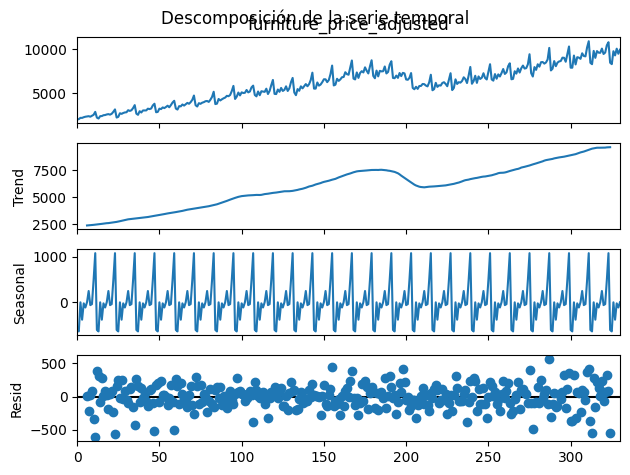

In [ ]:
# Descomposición aditiva en tendencia, estacionalidad y residuo
decomposition = seasonal_decompose(df['furniture_price_adjusted'], model='additive', period=12)
decomposition.plot()

plt.suptitle("Descomposición de la serie temporal")
plt.show()


## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

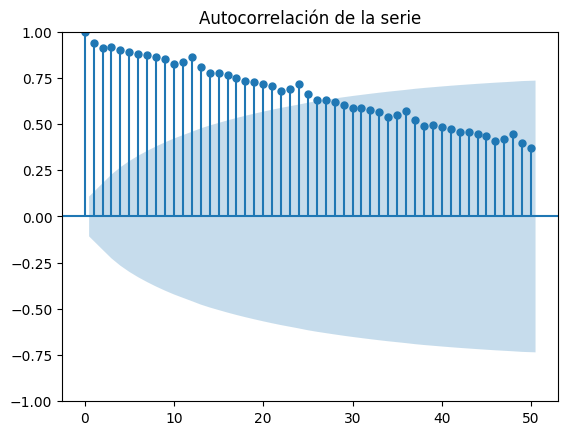

In [ ]:
# Comprobar estacionalidad con ACF (Autocorrelación)
plot_acf(df['furniture_price_adjusted'], lags=50)
plt.title("Autocorrelación de la serie")
plt.show()


- Si hay picos repetidos, probablemente hay estacionalidad (como cada 12 meses → anual)

## 9. ¿Qué dependencia tiene cada instante de sus últimos 5 lags? Demuéstralo mediante una matriz de correlación.

In [ ]:
# Crear columnas
for i in range(1, 6):
    df[f'lag_{i}'] = df['furniture_price_adjusted'].shift(i)

# Ver la matriz de correlación
corr_matrix = df[['furniture_price_adjusted'] + [f'lag_{i}' for i in range(1, 6)]].corr()
print(corr_matrix)


                          furniture_price_adjusted     lag_1     lag_2  \
furniture_price_adjusted                  1.000000  0.951005  0.928338   
lag_1                                     0.951005  1.000000  0.950599   
lag_2                                     0.928338  0.950599  1.000000   
lag_3                                     0.945035  0.927538  0.950224   
lag_4                                     0.940613  0.944637  0.926949   
lag_5                                     0.935901  0.939980  0.944155   

                             lag_3     lag_4     lag_5  
furniture_price_adjusted  0.945035  0.940613  0.935901  
lag_1                     0.927538  0.944637  0.939980  
lag_2                     0.950224  0.926949  0.944155  
lag_3                     1.000000  0.949927  0.926156  
lag_4                     0.949927  1.000000  0.949554  
lag_5                     0.926156  0.949554  1.000000  


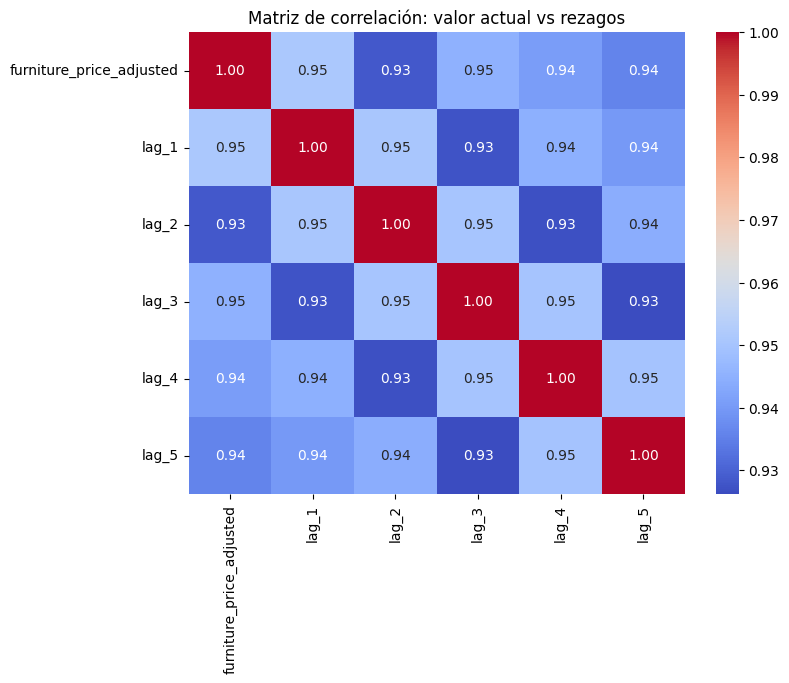

In [ ]:
# Visualizar con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación: valor actual vs rezagos")
plt.show()

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

- hay estacionalidad anual.

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

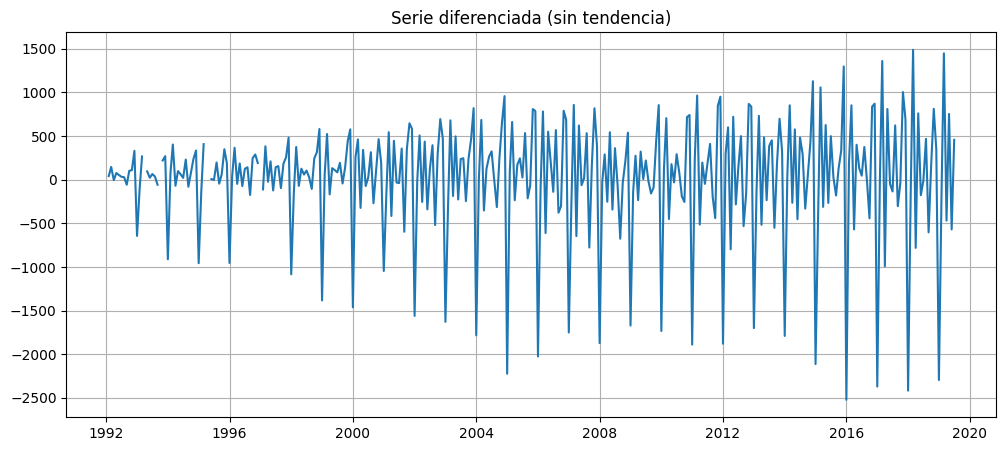

In [ ]:
# Diferenciar para hacer la serie más estacionaria
df['detrended'] = df['furniture_price_adjusted'].diff()

# Graficar la serie sin tendencia
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['detrended'])
plt.title("Serie diferenciada (sin tendencia)")
plt.grid(True)
plt.show()
